Trying out the ability to construct new deep drilling surveys

In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp

In [2]:
survey_length = 5.3 # days
# Define what we want the final visit ratio map to look like
filtername = 'r'

target_map = fs.standard_goals()[filtername]

# Set up basis functions
bfs = []
bfs.append(fs.M5_diff_basis_function(filtername=filtername))
bfs.append(fs.Target_map_basis_function(target_map=target_map, filtername=filtername, out_of_bounds_val=hp.UNSEEN))
bfs.append(fs.North_south_patch_basis_function(zenith_min_alt=50.))
bfs.append(fs.Slewtime_basis_function(filtername=filtername))

# Weights for basis functions
weights = np.array([1, 0.2, 1., 2.])
survey = fs.Greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername)
surveys = [survey]
dd = fs.Deep_drilling_survey(50., -30.)
surveys.append(dd)
scheduler = fs.Core_scheduler(surveys)

In [3]:
# Run the survey
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='one_filter_testing.db',
                                                     delete_past=True)

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 99.3%Completed 4201 observations


In [4]:
# Grab LMST and latitude to rotate all plots to alt-az.
status = observatory.return_status()
r1 = status['lmst']*180/12
r2 = np.degrees(observatory.obs.lat)

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


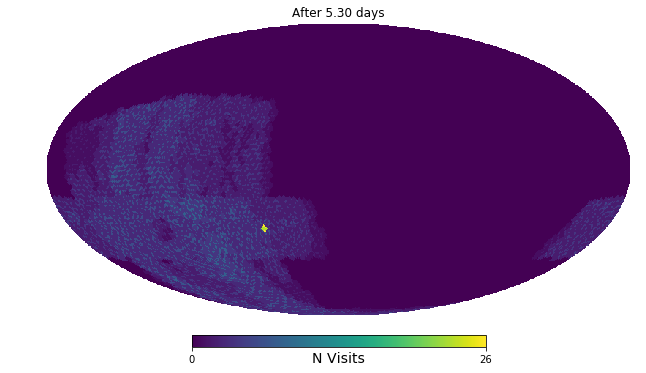

In [5]:
# Plot the number of observations taken at every point
hp.mollview(surveys[0].basis_functions[1].survey_features['N_obs'].feature,  unit='N Visits',  title='After %.2f days'%survey_length)

In [6]:
surveys[1].extra_features['sun_moon_alt'].feature

{'moonAlt': -0.79818207158391741, 'sunAlt': -0.34222299706445619}

In [7]:
surveys[1].extra_features['N_obs_self'].feature

96

In [8]:
# Now let's do it, but have the wide area ignore the incomming DD observations
bfs = []
bfs.append(fs.M5_diff_basis_function(filtername=filtername))
bfs.append(fs.Target_map_basis_function(target_map=target_map, filtername=filtername, out_of_bounds_val=hp.UNSEEN))
bfs.append(fs.North_south_patch_basis_function(zenith_min_alt=50.))
bfs.append(fs.Slewtime_basis_function(filtername=filtername))

# Weights for basis functions
weights = np.array([1, 0.2, 1., 2.])
# XXX--note I'm setting ignore_obs
survey = fs.Greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername, ignore_obs='DD-try')
surveys = [survey]
dd = fs.Deep_drilling_survey(50., -30., survey_name='DD-try')
surveys.append(dd)
scheduler = fs.Core_scheduler(surveys)

In [9]:
# Run the survey
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='one_filter_testing.db',
                                                     delete_past=True)

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 99.3%Completed 4206 observations


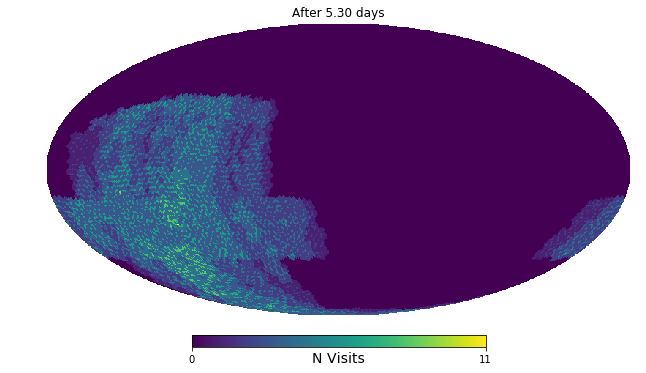

In [10]:
# Plot the number of observations taken at every point
hp.mollview(surveys[0].basis_functions[1].survey_features['N_obs'].feature,  unit='N Visits',  title='After %.2f days'%survey_length)

In [11]:
surveys[1].extra_features['N_obs_self'].feature

96